In [1]:
import torch
import numpy as np
import pandas as pd
from preprocess.PreProcess import TA_PreProcess
from trainer import SC_BERT_trainer
from models import BERT
import warnings
warnings.filterwarnings("ignore")

In [2]:
model_name = 'BERT'
data_name = 'TA'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
seed = 5
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True

In [3]:
ta = TA_PreProcess(bert=True)
w2v_model, train_set, dev_set, test_set = ta.get_dataset_bert()

N_vocab: 14356 | D_embed: 200 | N_aspects: 20


Some weights of the model checkpoint at ./model_params/bert were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


We have added 6625 tokens


### Train

In [4]:
model = BERT(w2v_model.E).to(device)
model

BERT(
  (E): Embedding(14356, 200)
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(37147, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, ele

In [4]:
epochs = 20
batch_size = 64
trainer = SC_BERT_trainer(data_name=data_name)

validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.98it/s]


EPOCH: 1 | TRAIN LOSS: 0.90672 | TRAIN-F1: 0.42633 | VAL LOSS: 0.01307 | VAL-F1: 0.48005


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.95it/s]


EPOCH: 2 | TRAIN LOSS: 0.79162 | TRAIN-F1: 0.45198 | VAL LOSS: 0.01125 | VAL-F1: 0.55581


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.95it/s]


EPOCH: 3 | TRAIN LOSS: 0.79318 | TRAIN-F1: 0.68162 | VAL LOSS: 0.01048 | VAL-F1: 0.63667


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.94it/s]


EPOCH: 4 | TRAIN LOSS: 0.74833 | TRAIN-F1: 0.58760 | VAL LOSS: 0.01016 | VAL-F1: 0.66155


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.94it/s]


EPOCH: 5 | TRAIN LOSS: 0.60743 | TRAIN-F1: 0.70455 | VAL LOSS: 0.01022 | VAL-F1: 0.67666


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.95it/s]


EPOCH: 6 | TRAIN LOSS: 0.76500 | TRAIN-F1: 0.65171 | VAL LOSS: 0.00982 | VAL-F1: 0.67648


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.95it/s]


EPOCH: 7 | TRAIN LOSS: 0.45979 | TRAIN-F1: 0.72237 | VAL LOSS: 0.00987 | VAL-F1: 0.67149


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.95it/s]


EPOCH: 8 | TRAIN LOSS: 0.57497 | TRAIN-F1: 0.64998 | VAL LOSS: 0.00987 | VAL-F1: 0.67113


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.95it/s]


EPOCH: 9 | TRAIN LOSS: 0.51234 | TRAIN-F1: 0.73586 | VAL LOSS: 0.01000 | VAL-F1: 0.66656


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.95it/s]


EPOCH: 10 | TRAIN LOSS: 0.65363 | TRAIN-F1: 0.57633 | VAL LOSS: 0.00988 | VAL-F1: 0.67793


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.95it/s]


EPOCH: 11 | TRAIN LOSS: 0.50958 | TRAIN-F1: 0.73327 | VAL LOSS: 0.00991 | VAL-F1: 0.67395


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.95it/s]


EPOCH: 12 | TRAIN LOSS: 0.57402 | TRAIN-F1: 0.80157 | VAL LOSS: 0.00986 | VAL-F1: 0.67646


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.95it/s]


EPOCH: 13 | TRAIN LOSS: 0.54297 | TRAIN-F1: 0.62325 | VAL LOSS: 0.00993 | VAL-F1: 0.67098


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.95it/s]


EPOCH: 14 | TRAIN LOSS: 0.55256 | TRAIN-F1: 0.68866 | VAL LOSS: 0.00991 | VAL-F1: 0.67489


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.94it/s]


EPOCH: 15 | TRAIN LOSS: 0.67413 | TRAIN-F1: 0.69056 | VAL LOSS: 0.00986 | VAL-F1: 0.67289


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.95it/s]


EPOCH: 16 | TRAIN LOSS: 0.45856 | TRAIN-F1: 0.72913 | VAL LOSS: 0.00985 | VAL-F1: 0.67526


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.93it/s]


EPOCH: 17 | TRAIN LOSS: 0.67485 | TRAIN-F1: 0.70704 | VAL LOSS: 0.00985 | VAL-F1: 0.67342


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.94it/s]


EPOCH: 18 | TRAIN LOSS: 0.48553 | TRAIN-F1: 0.69931 | VAL LOSS: 0.00988 | VAL-F1: 0.67432


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.94it/s]


EPOCH: 19 | TRAIN LOSS: 0.64942 | TRAIN-F1: 0.67672 | VAL LOSS: 0.00988 | VAL-F1: 0.67370


validating: 100%|██████████████████████████████████████████████████████████████████████| 45/45 [00:05<00:00,  7.76it/s]


EPOCH: 20 | TRAIN LOSS: 0.52796 | TRAIN-F1: 0.69889 | VAL LOSS: 0.00989 | VAL-F1: 0.67339


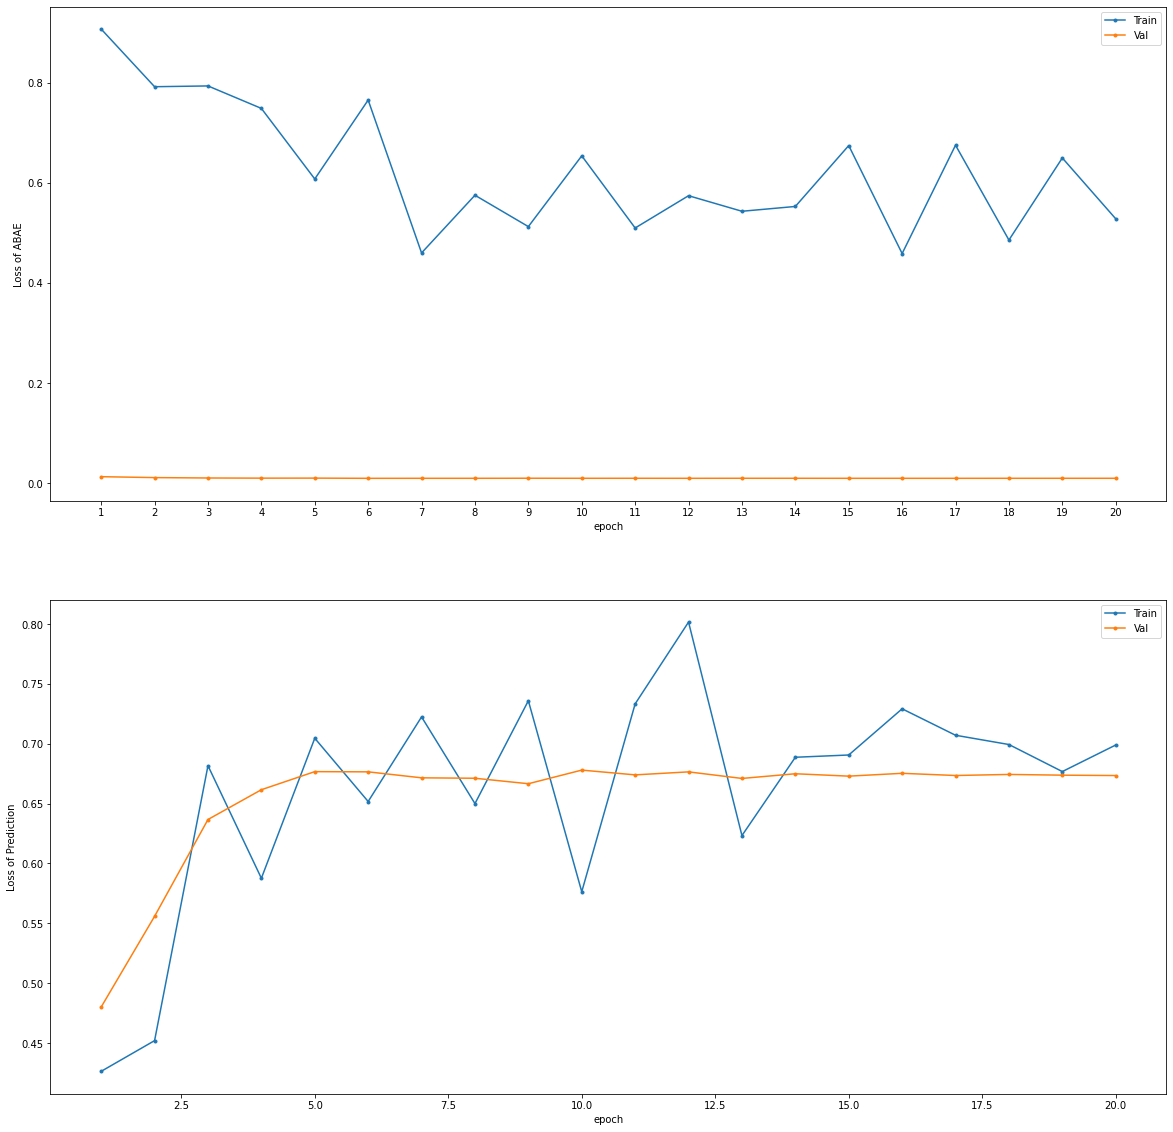

In [6]:
trainer.train(model=model, train_set=train_set, dev_set=dev_set, device=device, epochs=epochs, batch_size=batch_size, 
              data_name=data_name, model_name=model_name + '_' + str(seed))

### Test

In [5]:
model = BERT(w2v_model.E).to(device)
model.load_state_dict(torch.load("./model_params/" + data_name + "_" + model_name + "_" + str(seed) + "_10.model", map_location=device))
model.eval()

BERT(
  (E): Embedding(14356, 200)
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(37147, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, ele

In [6]:
trainer.test(model, test_set, batch_size=batch_size, device=device)

testing: 100%|█████████████████████████████████████████████████████████████████████████| 45/45 [00:06<00:00,  7.23it/s]

Precision: 0.6809157560647104
Recall: 0.6760882278613325
F1-score: 0.6739205259671431
Accuracy: 0.7256944444444444
